# ExperimentalData exploration

In [1]:
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import magine.data.tools as dt

from magine.plotting.wordcloud_tools import create_wordcloud
from magine.plotting.venn_diagram_maker import create_venn2, create_venn3

In [3]:
# load the experimental data
from exp_data import exp_data

## ExperimentalData class structure

In [4]:
help(exp_data)

Help on ExperimentalData in module magine.data.experimental_data object:

class ExperimentalData(builtins.object)
 |  Manages all experimental data
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, name)
 |  
 |  __init__(self, data_file)
 |      Parameters
 |      ----------
 |      data_file : str, pandas.DataFrame
 |          Name of file, generally csv.
 |          If provided a str, the file will be read in as a pandas.DataFrame
 |  
 |  __setattr__(self, name, value)
 |      Implement setattr(self, name, value).
 |  
 |  create_table_of_data(self, sig=False, unique=False, save_name=None, plot=False, write_latex=False)
 |      Creates a summary table of data.
 |      
 |      
 |      Parameters
 |      ----------
 |      sig: bool
 |          Flag to summarize significant species only
 |      save_name: str
 |          Name to save csv and .tex file
 |      unique: bool
 |          If you want to only consider unique species
 |          ie count gene species rather than P

# Stats about data


In [5]:
display(exp_data.create_table_of_data())
display(exp_data.create_table_of_data(sig=True))
display(exp_data.create_table_of_data(sig=True, unique=True))

sample_id,01hr,06hr,24hr,48hr,Total Unique Across
source,,,,,
C18,528,227,657,689,1412
HILIC,479,611,941,621,1521
label_free,3135,3091,2735,2504,4036
ph_silac,6903,10956,12176,11183,21924
rna_seq,18741,19104,19992,-,20642
silac,2923,3357,3072,3265,4086


sample_id,01hr,06hr,24hr,48hr,Total Unique Across
source,,,,,
C18,528,227,657,689,1412
HILIC,479,611,941,621,1521
label_free,201,46,281,911,1149
ph_silac,594,1370,2414,1368,4757
rna_seq,73,1999,12215,-,12340
silac,38,52,228,266,485


sample_id,01hr,06hr,24hr,48hr,Total Unique Across
source,,,,,
C18,522,227,653,685,1402
HILIC,471,605,930,613,1504
label_free,196,46,271,874,1085
ph_silac,514,888,1227,851,2278
rna_seq,73,1999,12215,-,12340
silac,38,52,228,266,485


### Extracting by sample (time point) or by category (experimental method)

The '.species' index aggregates all data. We can subdivide into '.compounds', '.genes' (includes 'species_type'=='gene'), '.rna' (includes 'species_type'=='gene', 'source' == 'rna'), or '.protein' ('species_type'=='gene', 'source' != 'rna'). 

We can also filter based on the 'source' column


In [6]:
exp_data.species.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
5,RP11-639F1.1,RP11-639F1.1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
6,TP63,TP63_rnaseq,protein,-12.355659,0.001020,True,06hr,rna_seq
7,JARID2,JARID2_rnaseq,protein,-7.891502,0.001020,True,06hr,rna_seq
8,GLI2,GLI2_rnaseq,protein,-5.389009,0.001020,True,06hr,rna_seq
9,MAP3K5,MAP3K5_rnaseq,protein,-4.262353,0.001893,True,06hr,rna_seq


In [7]:
exp_data.genes.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
5,RP11-639F1.1,RP11-639F1.1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
6,TP63,TP63_rnaseq,protein,-12.355659,0.001020,True,06hr,rna_seq
7,JARID2,JARID2_rnaseq,protein,-7.891502,0.001020,True,06hr,rna_seq
8,GLI2,GLI2_rnaseq,protein,-5.389009,0.001020,True,06hr,rna_seq
9,MAP3K5,MAP3K5_rnaseq,protein,-4.262353,0.001893,True,06hr,rna_seq


We can also filter the data by 'source' using the '.name', where name is anything in the 'source' column. We can get a list of these by printing exp_data.exp_methods 


In [8]:
# prints all the available exp_methods
exp_data.exp_methods

['rna_seq', 'ph_silac', 'label_free', 'silac', 'C18', 'HILIC']

In [9]:
# filters to only the 'label_free' 
exp_data.label_free.shape

(13085, 8)

In [10]:
exp_data.label_free.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
102446,LIMS1,LIMS1_lf,protein,12.42,0.00003,True,01hr,label_free
102447,SMARCE1,SMARCE1_lf,protein,-2.49,0.00030,True,01hr,label_free
102448,HEXA,HEXA_lf,protein,6.42,0.00060,True,01hr,label_free
102449,SRSF1,SRSF1_lf,protein,-3.21,0.00060,True,01hr,label_free
102450,SF3B1,SF3B1_lf,protein,-1.57,0.00130,True,01hr,label_free
102451,USP15,USP15_N-term A(ace)2_lf,protein,18.78,0.00270,True,01hr,label_free
102452,CKAP4,CKAP4_lf,protein,-3.26,0.00300,True,01hr,label_free
102453,DDX17,DDX17_lf,protein,-3.08,0.00340,True,01hr,label_free
102454,SRSF3,SRSF3_lf,protein,-4.66,0.00360,True,01hr,label_free
102455,PABPC4,PABPC4_lf,protein,-5.34,0.00380,True,01hr,label_free


In [11]:
exp_data.compounds.shape

(4780, 8)

In [12]:
exp_data.proteins.shape

(70127, 8)

In [13]:
exp_data.genes.shape

(128152, 8)

In [14]:
exp_data.rna.shape

(58025, 8)

We can use the 'significant_flag' column to filter that data to only contain those species.

In [15]:
exp_data.rna_seq.sig.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
5,RP11-639F1.1,RP11-639F1.1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
6,TP63,TP63_rnaseq,protein,-12.355659,0.001020,True,06hr,rna_seq
7,JARID2,JARID2_rnaseq,protein,-7.891502,0.001020,True,06hr,rna_seq
8,GLI2,GLI2_rnaseq,protein,-5.389009,0.001020,True,06hr,rna_seq
9,MAP3K5,MAP3K5_rnaseq,protein,-4.262353,0.001893,True,06hr,rna_seq


## Filter data to up or down regulated species.

In [16]:
exp_data.rna_seq.up.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
13,DLX2,DLX2_rnaseq,protein,2.874358,0.001020,True,06hr,rna_seq
18,RETSAT,RETSAT_rnaseq,protein,2.325934,0.001020,True,06hr,rna_seq
21,SLC52A1,SLC52A1_rnaseq,protein,2.871869,0.001020,True,06hr,rna_seq
24,OTUD3,OTUD3_rnaseq,protein,1.821775,0.001020,True,06hr,rna_seq
35,RP11-209D14.2,RP11-209D14.2_rnaseq,protein,1.819533,0.025204,True,06hr,rna_seq
58,ZNF554,ZNF554_rnaseq,protein,2.309691,0.004153,True,06hr,rna_seq
59,FZD9,FZD9_rnaseq,protein,1.812798,0.001020,True,06hr,rna_seq
71,SBK1,SBK1_rnaseq,protein,1.806427,0.002689,True,06hr,rna_seq
88,PPM1D,PPM1D_rnaseq,protein,1.803186,0.001020,True,06hr,rna_seq
92,ZNF425,ZNF425_rnaseq,protein,2.846581,0.001020,True,06hr,rna_seq


In [17]:
exp_data.rna_seq.down.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
5,RP11-639F1.1,RP11-639F1.1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
6,TP63,TP63_rnaseq,protein,-12.355659,0.001020,True,06hr,rna_seq
7,JARID2,JARID2_rnaseq,protein,-7.891502,0.001020,True,06hr,rna_seq
8,GLI2,GLI2_rnaseq,protein,-5.389009,0.001020,True,06hr,rna_seq
9,MAP3K5,MAP3K5_rnaseq,protein,-4.262353,0.001893,True,06hr,rna_seq


### Pivot table to get table across time

In [18]:
exp_data.label_free.pivoter(
    convert_to_log=False, 
    index='identifier',
    columns='sample_id',
    values=['fold_change', 'p_value']
).head(10)

fold_change                        p_value                    \
sample_id         01hr   06hr   24hr   48hr      01hr     06hr     24hr   
identifier                                                                
A2M           1.040000  1.140  51.93  11.58  0.514800  0.44370  0.24260   
AACS         -1.100000  3.740    NaN    NaN  0.281800  0.26950      NaN   
AAGAB         1.000000 -1.150   1.46  -2.03  0.968100  0.39240  0.84450   
AAK1          1.320000  1.590    NaN   1.72  0.715800  0.18110      NaN   
AAMP         -1.200000 -1.460   1.85   1.78  0.836800  0.55420  0.13640   
AAR2               NaN -1.690    NaN    NaN       NaN  0.96510      NaN   
AARS          0.326667 -0.035  -1.44  -3.12  0.299867  0.62425  0.46725   
AARS2         1.170000    NaN    NaN    NaN  0.253000      NaN      NaN   
AARSD1        1.210000  4.070  -2.05    NaN  0.459700  0.49160  0.78440   
AASDHPPT     -0.330000  1.020   1.07  -1.11  0.709600  0.81160  0.45290   

                     
sample_id      48hr  
identifier           
A2M         0.11130  
AACS            NaN  
AAGAB       0.09760  
AAK1        0.95660  
AAMP        0.32460  
AAR2            NaN  
AARS        0.00045  
AARS2           NaN  
AARSD1          NaN  
AASDHPPT    0.00070

Note that in the previous two examples, we find that there are NaN values. This is because of our experiental data. We can easy check what species are not found in all 4 of our label free experiements.

In [19]:
print(len(exp_data.label_free.filter_by_minimum_present_columns(
    index='identifier',
    columns='sample_id',
).id_list))

Number in index went from 3447 to 1819
1819


This shows that out of the 3447 unique species measured in label-free proteomics, only 1819 were measured in all time points. What one can do with this information is dependent on the analysis. For now, we will keep using the full dataset.

We can also loop through each sample to get a list of the significant species perturbed at the sample.

In [20]:
for i in range(len(exp_data.label_free.by_sample)):
    print(exp_data.label_free.sample_ids[i], len(exp_data.label_free.by_sample[i]))

01hr 2766
06hr 2742
24hr 2551
48hr 2261


Example where we only look at label-free proteomics and require there be a signficant change in at least 3 time points.

In [21]:
lf_sig = exp_data.label_free.filter_by_minimum_sig_columns(
    index='label', 
    columns='sample_id', 
    min_terms=3
)
display(lf_sig.head(10))

Number in index went from 4036 to 48


,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
102449,SRSF1,SRSF1_lf,protein,-3.21,0.0006,True,01hr,label_free
102457,PHB,PHB_lf,protein,-3.54,0.0045,True,01hr,label_free
102462,LMNA,LMNA_lf,protein,-3.57,0.0062,True,01hr,label_free
102468,SNRPC,SNRPC_lf,protein,-4.47,0.0082,True,01hr,label_free
102473,SNRPF,SNRPF_lf,protein,-1.78,0.0108,True,01hr,label_free
102479,VDAC1,VDAC1_lf,protein,-3.98,0.0137,True,01hr,label_free
102480,HNRNPA2B1,HNRNPA2B1_lf,protein,-5.68,0.0142,True,01hr,label_free
102486,ERH,ERH_N-term S(ace)2_lf,protein,-3.85,0.0179,True,01hr,label_free
102491,RPL23A,RPL23A_lf,protein,-1.57,0.0213,True,01hr,label_free
102495,MATR3,MATR3_lf,protein,-13.70,0.0237,True,01hr,label_free


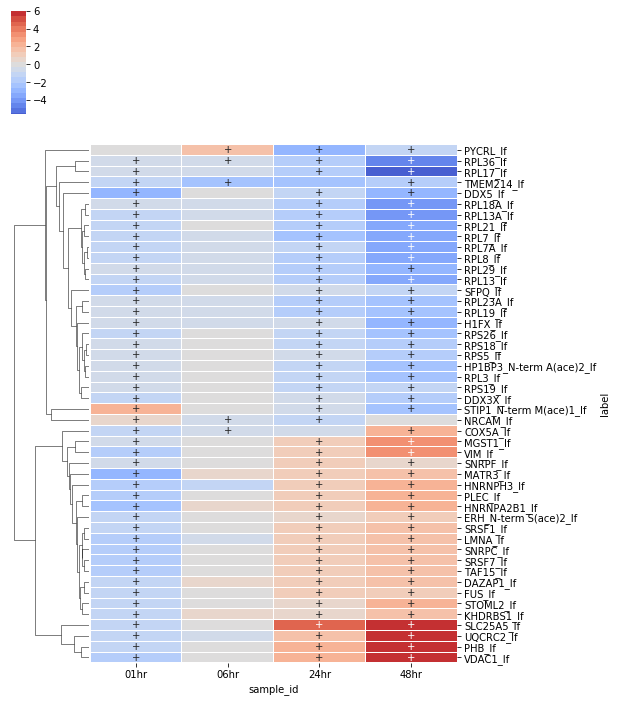

In [22]:
lf_sig.heatmap(
    convert_to_log=True, 
    cluster_row=True, 
    index='label',
    values='fold_change', 
    columns='sample_id', 
    annotate_sig=True, 
    figsize=(8, 12), 
    div_colors=True,
    num_colors=21, 
    linewidths=0.01
);

## Plotting subset of species

We provide the a few plotting interfaces to explore that subsets of the data.


### Ploty

In [23]:
exp_data.label_free.plot_species(['LMNA', 'VDAC1'], plot_type='plotly')

### matplotlib

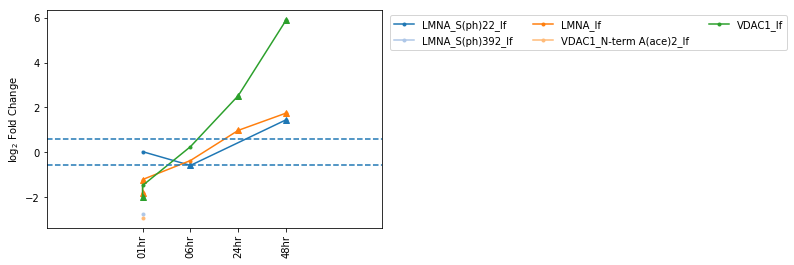

In [24]:
exp_data.label_free.plot_species(['LMNA', 'VDAC1'], plot_type='matplotlib');

### Heatplots

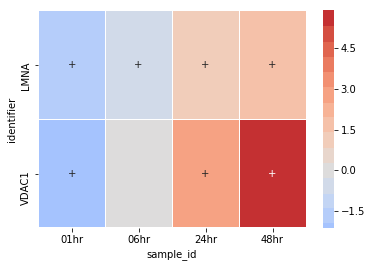

In [25]:
exp_data.label_free.heatmap(
    ['LMNA', 'VDAC1'], 
    figsize=(6,4), 
    linewidths=0.01
);

Notice that the above splot doesn't show any of the modifiers of LMBA (no _s(ph)22_lf). This is because the default index to pivot plots is the 'identifier' column. You can set the 'label' column for plotting by passing index='label' to the function. Note, if you want to filter the data using the more generic 'identifier' column, you just specify that with subset_index='identifier'

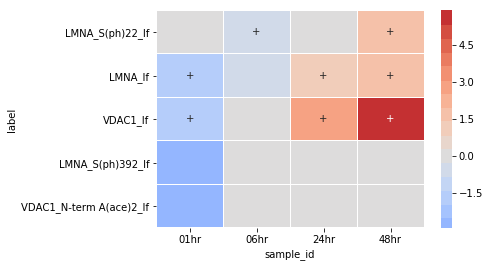

In [26]:
exp_data.label_free.heatmap(
    ['LMNA', 'VDAC1'], 
    subset_index='identifier', 
    index='label',
    figsize=(6,4), 
    linewidths=0.01
);

We can also chain together the expressions to select subsets, then view in one line.

Number in index went from 775 to 24


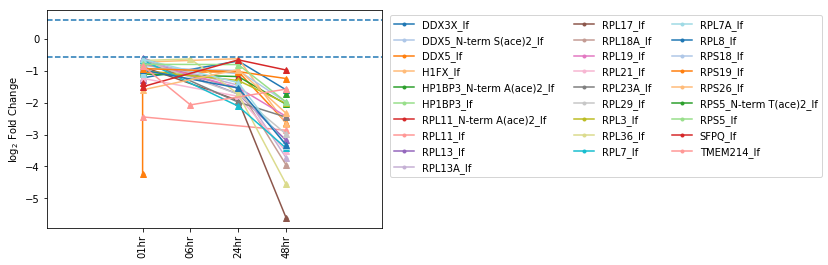

In [27]:
exp_data.label_free.down.filter_by_minimum_sig_columns(min_terms=3).plot_species(plot_type='matplotlib');

Number in index went from 775 to 24


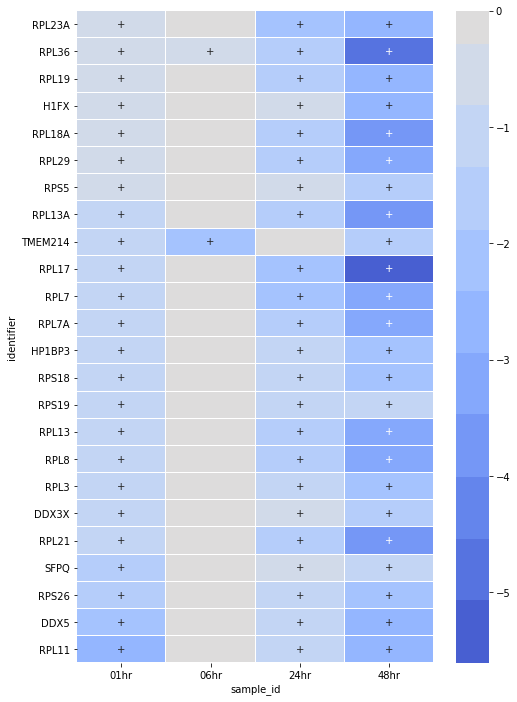

In [28]:
exp_data.label_free.down.filter_by_minimum_sig_columns(min_terms=3).heatmap(linewidths=0.01);

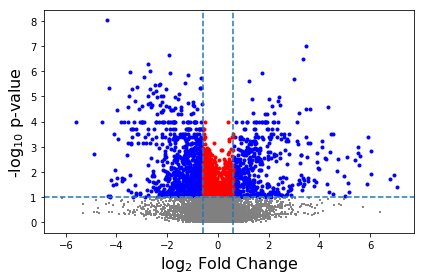

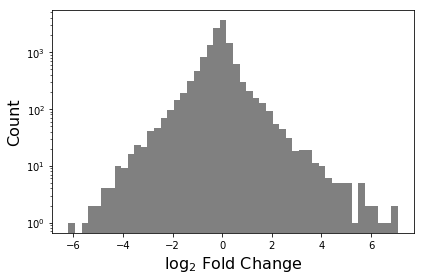

In [29]:
v_plot = exp_data.label_free.volcano_plot(save_name='lf_volcano')
hist_plot = exp_data.label_free.create_histogram_measurements('hist')

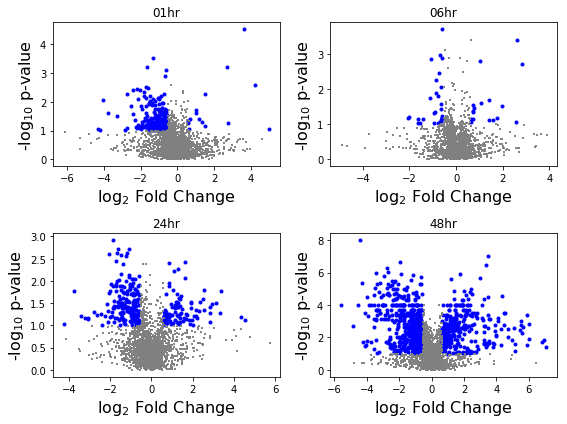

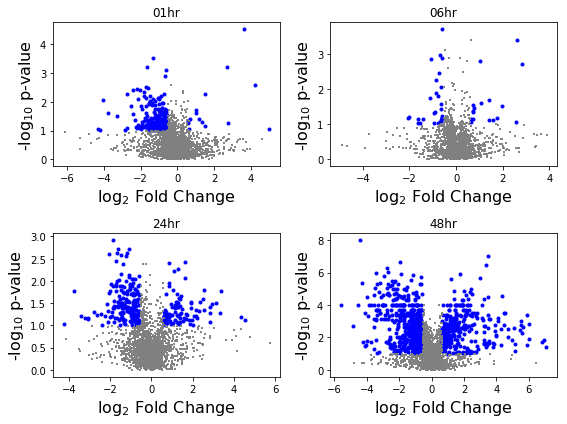

In [30]:
exp_data.label_free.time_series_volcano(sig_column=True)

## Extending to other plots

Since our exp_data is built off a pandas.DataFrame, we can use other packages that take that data format. Seaborn is one such tool that provides some very nice plots.

c:\users\pinojc\miniconda3\envs\magine_36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



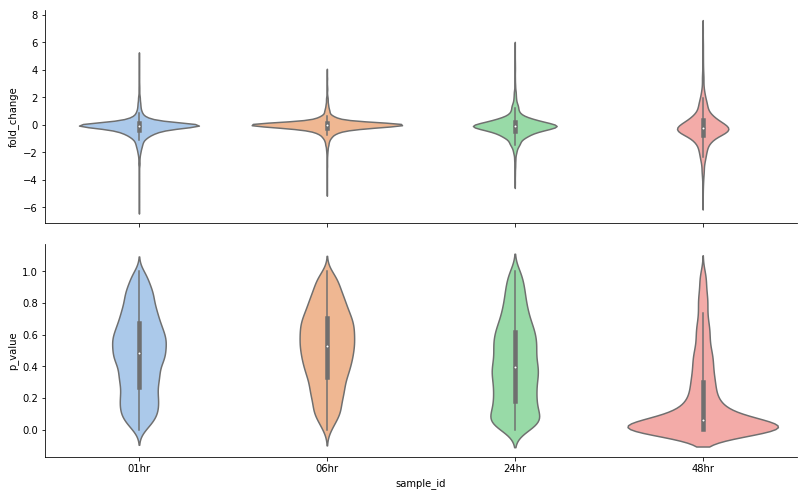

In [31]:
label_free = exp_data.label_free.copy()
label_free.log2_normalize_df(column='fold_change', inplace=True)

g = sns.PairGrid(label_free,
                 x_vars=('sample_id'),
                 y_vars=('fold_change', 'p_value'),
                 hue='source',
                 aspect=3.25, height=3.5)
g.map(
    sns.violinplot, 
    palette="pastel", 
    split=True,
    order=list(label_free.sample_ids)
);

## Venn diagram comparisons between measurements

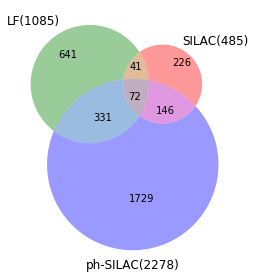

In [32]:
lf = exp_data.label_free.sig.id_list
silac = exp_data.silac.sig.id_list
phsilac = exp_data.ph_silac.sig.id_list

create_venn3(lf, silac, phsilac, 'LF', 'SILAC', 'ph-SILAC');

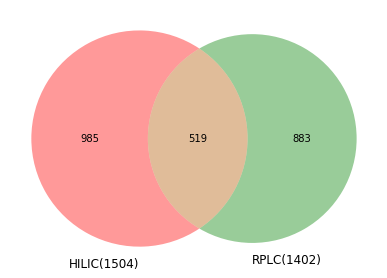

In [33]:
hilic = exp_data.HILIC.sig.id_list
rplc = exp_data.C18.sig.id_list

create_venn2(hilic, rplc, 'HILIC', 'RPLC');